You need to implement Logistic Regression from scratch in this question

1. You are provided with the dataset of sign language digits. Implement logistic regression from scratch to classify the images provided in the dataset. Load the dataset and perform splitting into training and test sets with 70:30 ratio randomly using test train split.
2. Plot a diagram for the sigmoid function. This is used for binary classi cation. How do you modify it for multilabel dataset classification problems? State and Explain the methods used.
3. Use both one vs all and one vs one method for the above problem statement purpose.
4. Also get results using Log Reg from scikit learn.
5. Report accuracy score, Confusion matrix and any other metrics you feel useful and Compare the results - from all the three.



[BONUS]
6. Display few pictures with their predicted and original labels 
7. Do the results differ? State the reasons why it is so.


dataset link : 
https://iiitaphyd-my.sharepoint.com/:f:/g/personal/apurva_jadhav_students_iiit_ac_in/Eictt5_qmoxNqezgQQiMWeIBph4sxlfA6jWAJNPnV2SF9Q?e=mQmYN0 

                

In [1]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
import seaborn as sn

## Exploratory Data Analysis

In [2]:
x_l = np.load("X.npy") # image
y_l = np.load("Y.npy") # label

In [3]:
x_l.shape

(2062, 64, 64)

### Plotting few random data point's images and its corresponding label

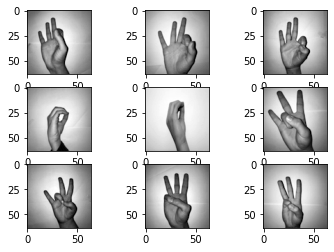

In [4]:
from matplotlib import pyplot
# plot first few images
j=0
for i in range(0,900,100):
    # define subplot
    pyplot.subplot(331 + j)
    j+=1
    # plot raw pixel data
    pyplot.imshow(x_l[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [5]:
# corresponding labels of above images
for i in range(0,900,100):
    print (y_l[i])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


## Custom Logistic Regression with 2 multi-class methods : one-vs-all and one-vs-one.

In [6]:
class myLogisticRegression:
    def __init__(self, n_iter, lr, num_classes, multi_class="ovo"):
        self.n_iter = n_iter
        self.lr = lr
        self.num_classes = num_classes
        self.n_model_ovo = 45
        self.n_model_ova = 10
        self.multi_class = multi_class
        if self.multi_class=="ovo":
            self.n_models = 45
        else:
            self.n_models = 10

    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
    
    def cost_function(self, y, hypo):
        predict_1 = y*np.log(hypo)
        predict_0 = (1-y)*np.log(1-hypo)
        return (-np.sum(predict_0 + predict_1))/self.n_samples
    
    def fit(self, X, y_all):
        print ("shape of X is : " , X.shape)
        self.n_features = X.shape[1]
        self.n_samples = X.shape[0]
        
        self.final_weights_each_class = list()
        self.cost_each_class = list()
        
        # training of each class
        
        #  one vs rest:
        if self.multi_class=="ovr":
            for i in range(self.num_classes):
                y = y_all[:,i]
                weights = np.random.randn(1,self.n_features)
                bias = 0
                cost = list()
                k=0
                print('\nTraining for class '+str(i))

                for iter_ in range(self.n_iter):
                    k += 1
                    z = np.dot(weights,X.T) + bias

                    yhat = self.sigmoid(z)
#                     print("yhat : ", yhat.shape)
#                     print ("\n y : ", y.shape)
#                     print ("yhat : ", yhat.shape, "   :  ", y.shape)
#                     print ("\n : ", y)
#                     cost_function
                    c = self.cost_function(y, yhat)
                    cost.append(c)

                    # updating weights and bias using gradient descent method
                    dw = np.dot(yhat-y, X)*(1/self.n_features)
                    db = np.sum(yhat-y)*(1/self.n_features)
                    weights -= (self.lr*dw)
                    bias -= (self.lr*db)
                    threshold = 0.00001

                    if iter_ > 2:
                        prev_cost = cost[-2]
                        curr_cost = c
                        if abs(curr_cost - prev_cost) < threshold:
                            break

                self.final_weights_each_class.append([weights,bias])
                self.cost_each_class.append(cost)
                print ("total iteration : ", k)
             
        # one vs one :
        else:
#             print ("here in ovo fit\n")
            dataset_dict= {c:[] for c in range(self.n_model_ovo)}
            y_encoded = y_all

            for i in range(y_encoded.shape[0]):
                dataset_dict[y_encoded[i]].append([X[i],y_encoded[i]])
            
            class_no=0
            for i in range(10):
                for j in range(i+1,10):
                    data1 = np.array(dataset_dict[i])
                    data2 = np.array(dataset_dict[j])
                    X = np.concatenate((data1[:,0],data2[:,0]), 0)
                    x_t2 = list(X)
                    X = np.asarray(x_t2)
                    y = np.concatenate((data1[:,1],data2[:,1]), 0)
                    y_t2 = list(y)
                    y = np.asarray(y_t2)
                    
                    y_uniq = list(set(y))
                   
                    for index in range(y.shape[0]):
#                         print("yval : ", y[i])
                        if y[index] == y_uniq[0]:
                            y[index] = 1
                        else:
                            y[index] = 0
                            
#                     print ("set y : ", set(y))        
                    X, y = shuffle(X, y, random_state=2)
#                     print ("X shape after : ", X.shape)
#                     print ("y shape after : ", y.shape)

#                     for i in range(self.num_classes):
#                     y = y_all[:,i]
                    weights = np.random.randn(1,self.n_features)
                    bias = 0
                    cost = list()
                    k=0
                    print('\nTraining for class '+str(class_no))
#                     print("shape0 of X : ", X.shape)
                    for iter_ in range(self.n_iter):
                        k += 1
                        z = np.dot(weights,X.T) + bias

                        yhat = self.sigmoid(z)
#                         if clas/s_no%2==1:
#                         print ("yhat : ", yhat.shape)
#                         print ("\n y ", y.shape)
                        # cost_function
                        c = self.cost_function(y, yhat)
#                         c = y * np.log (yhat)  + (1-y) * np.log (1-yhat) if ( yhat!= 1 and yhat!= 0 ) else 0
#                         print ("c : ", c)
                        cost.append(c)

                        # updating weights and bias using gradient descent method
                        dw = np.dot(yhat-y, X)*(1/self.n_features)
                        db = np.sum(yhat-y)*(1/self.n_features)
                        weights -= (self.lr*dw)
                        bias -= (self.lr*db)
                        threshold = 0.00001

                        if iter_ > 2:
                            prev_cost = cost[-2]
                            curr_cost = c
                            if abs(curr_cost - prev_cost) < threshold:
                                break

                    self.final_weights_each_class.append([weights,bias])
                    self.cost_each_class.append(cost)
                    
#                     print ("len of cost list. : ", (cost))
                    print ("total iteration : ", k)
                    class_no += 1
#             print("len of cost : ", len(self.cost_each_class))

        return self
    
    def predict(self, x_test):
        n_test = x_test.shape[0]
        predicted = list()
        if self.multi_class=="ovr":
            for i in range(n_test):
                prob = list()
                data = x_test[i, :]
                for j in range(self.num_classes):
                    weights = self.final_weights_each_class[j][0]
                    bias = self.final_weights_each_class[j][1]
                    z = np.dot(weights, data.T) + bias
                    yhat = self.sigmoid(z)
                    prob.append(yhat)

                predict_class = prob.index(max(prob))
                predicted.append(predict_class)
                
        else:
            for i in range(n_test):
                output_class = list()
                data = x_test[i, :]
                index =0
                for j in range(10):
                    for k in range(j+1, 10):
                        weights = self.final_weights_each_class[index][0]
                        bias = self.final_weights_each_class[index][1]
                        z = np.dot(weights, data.T) + bias
                        yhat = self.sigmoid(z)
                        if(yhat > 0.5):
                            output_class.append(j)
                        else:
                            output_class.append(k)
                            
                        index += 1
                        
                predict_class = max(set(output_class), key = output_class.count) 
                predicted.append(predict_class)             
            
        return predicted

    
    def get_accuracy(self, actual, predicted):
        n_test = len(predicted)
        correct = 0
        for i in range(n_test):
            label = predicted[i]
            if self.multi_class=="ovr":
                if actual[i,label]==1:
                    correct+=1
            else:
                if actual[i]==label:
                    correct+=1
                
        return (correct/n_test)*100
    
    def plot_cost_function(self):
        
#         plots cost function for each of the 10 classes in ovr model
        fig,a =  plt.subplots(2,5,figsize=(35,15))
        a[0][0].plot(self.cost_each_class[0])
        a[0][0].set_title("0's dataset")
        a[0][1].plot(self.cost_each_class[1])
        a[0][1].set_title("1's dataset")
        a[0][2].plot(self.cost_each_class[2])
        a[0][2].set_title("2's dataset")
        a[0][3].plot(self.cost_each_class[3])
        a[0][3].set_title("3's dataset")
        a[0][4].plot(self.cost_each_class[4])
        a[0][4].set_title("4's dataset")
        a[1][0].plot(self.cost_each_class[5])
        a[1][0].set_title("5's dataset")
        a[1][1].plot(self.cost_each_class[6])
        a[1][1].set_title("6's dataset")
        a[1][2].plot(self.cost_each_class[7])
        a[1][2].set_title("7's dataset")
        a[1][3].plot(self.cost_each_class[8])
        a[1][3].set_title("8's dataset")
        a[1][4].plot(self.cost_each_class[9])
        a[1][4].set_title("9's dataset")
        plt.show()
    

##  Reshaping and splitting data 

In [7]:
# converting 3-D to 2-D data 
X_reshaped = x_l.reshape(len(x_l), -1)
X_reshaped.shape

(2062, 4096)

In [8]:
#normalizing data : 
scaler = MinMaxScaler()
scaler.fit(X_reshaped)
data_normalized = scaler.transform(X_reshaped)
print ("data normalized shape : ", data_normalized.shape)
# data_normalized

data normalized shape :  (2062, 4096)


In [9]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(data_normalized, y_l, test_size=0.30, random_state=42)

## 2. Plotting sigmoid function.

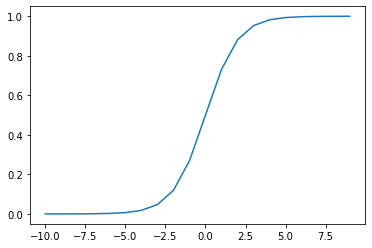

In [10]:
# Plotting sigmoid function

def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+np.exp(-item)))
    return a

x = np.arange(-10,10,1)
sig = sigmoid(x)
plt.plot(x,sig)
plt.show()

### How do you modify it for multilabel dataset classification problems? State and Explain the methods used.

## 3. Using both One vs Rest and One vs One method

shape of X is :  (1443, 4096)

Training for class 0


<ipython-input-6-fc61ca7a7088>:19: RuntimeWarning: divide by zero encountered in log
  predict_0 = (1-y)*np.log(1-hypo)
<ipython-input-6-fc61ca7a7088>:19: RuntimeWarning: invalid value encountered in multiply
  predict_0 = (1-y)*np.log(1-hypo)


total iteration :  8984

Training for class 1
total iteration :  6751

Training for class 2
total iteration :  10000

Training for class 3
total iteration :  8571

Training for class 4
total iteration :  7002

Training for class 5
total iteration :  9949

Training for class 6
total iteration :  5410

Training for class 7
total iteration :  8640

Training for class 8
total iteration :  10000

Training for class 9
total iteration :  8771


 plotting cost function graph : 


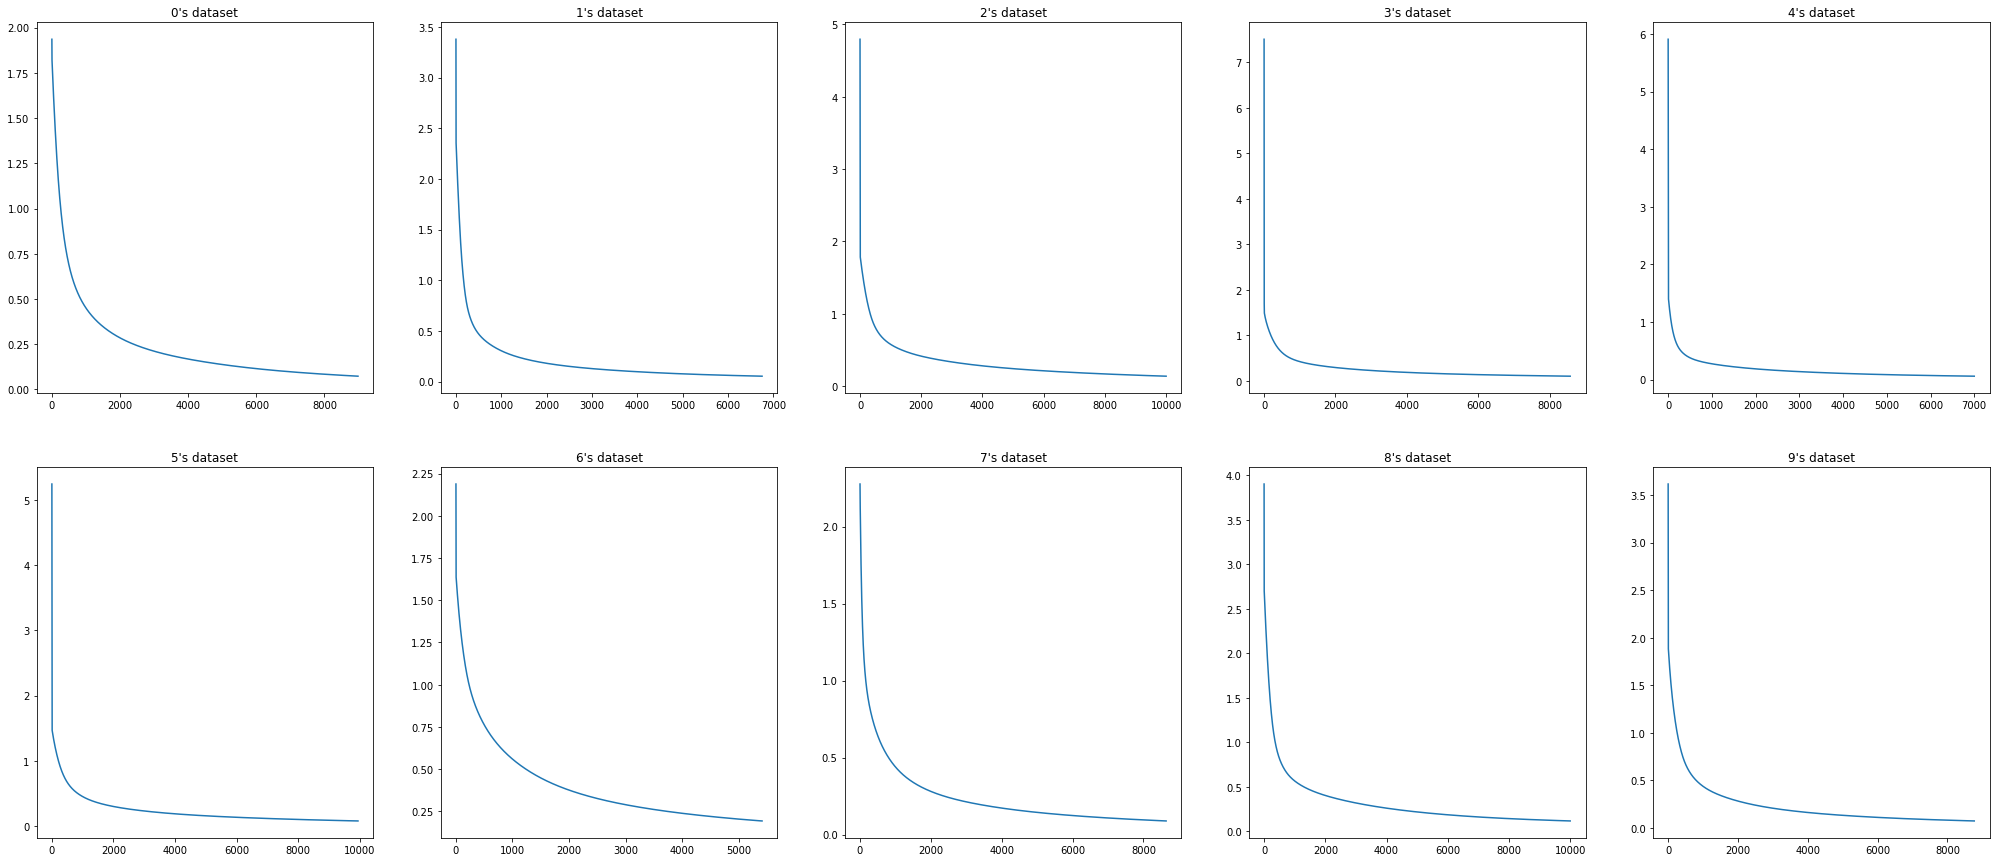


 accuracy for One vs Rest method:  63.812600969305336


In [19]:
#one vs rest 

multi_class_scheme = "ovr"
X_train, X_test, y_train, y_test = train_test_split(data_normalized, y_l, test_size=0.30, random_state=42)
X = X_train
y_encoded_train = np.where(y_train==1)[1]
y_encoded_test = np.where(y_test==1)[1]

if multi_class_scheme=="ovr":
    y = y_train
    yTest = y_test
elif multi_class_scheme=="ovo":
    y = y_encoded_train
    yTest = y_encoded_test


multi_class_scheme = "ovr"
lg = myLogisticRegression(n_iter=10000, lr=0.1, num_classes=10, multi_class = multi_class_scheme)
lg.fit(X, y)
predicted = lg.predict(X_test)

# plot cost function graph
print ("\n\n plotting cost function graph : ")
lg.plot_cost_function()

acc_ovr = lg.get_accuracy(yTest, predicted)

print("\n accuracy for One vs Rest method: ", acc_ovr)

In [18]:
# one vs one :

multi_class_scheme = "ovo"
X_train, X_test, y_train, y_test = train_test_split(data_normalized, y_l, test_size=0.30, random_state=42)
X = X_train
y_encoded_train = np.where(y_train==1)[1]
y_encoded_test = np.where(y_test==1)[1]

if multi_class_scheme=="ovr":
    y = y_train
    yTest = y_test
elif multi_class_scheme=="ovo":
    y = y_encoded_train
    yTest = y_encoded_test

    
# one vs one :
multi_class_scheme = "ovo"
lg = myLogisticRegression(n_iter=5000, lr=0.2, num_classes=10, multi_class = multi_class_scheme)
lg.fit(X, y)
predicted = lg.predict(X_test)
acc_ovo = lg.get_accuracy(yTest, predicted)
print("accuracy for One vs One method: ", acc_ovo)

shape of X is :  (1443, 4096)

Training for class 0


<ipython-input-6-fc61ca7a7088>:84: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data1 = np.array(dataset_dict[i])
<ipython-input-6-fc61ca7a7088>:85: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data2 = np.array(dataset_dict[j])


total iteration :  2712

Training for class 1
total iteration :  2621

Training for class 2
total iteration :  2509

Training for class 3
total iteration :  1879

Training for class 4


<ipython-input-6-fc61ca7a7088>:19: RuntimeWarning: divide by zero encountered in log
  predict_0 = (1-y)*np.log(1-hypo)
<ipython-input-6-fc61ca7a7088>:139: RuntimeWarning: invalid value encountered in double_scalars
  if abs(curr_cost - prev_cost) < threshold:


total iteration :  3349

Training for class 5
total iteration :  3382

Training for class 6


<ipython-input-6-fc61ca7a7088>:19: RuntimeWarning: invalid value encountered in multiply
  predict_0 = (1-y)*np.log(1-hypo)


total iteration :  3113

Training for class 7
total iteration :  5000

Training for class 8
total iteration :  3767

Training for class 9
total iteration :  3484

Training for class 10
total iteration :  5000

Training for class 11
total iteration :  5000

Training for class 12
total iteration :  5000

Training for class 13
total iteration :  5000

Training for class 14
total iteration :  5000

Training for class 15
total iteration :  3065

Training for class 16
total iteration :  5000

Training for class 17
total iteration :  5000

Training for class 18
total iteration :  3473

Training for class 19
total iteration :  3713

Training for class 20
total iteration :  4363

Training for class 21
total iteration :  2814

Training for class 22
total iteration :  3708

Training for class 23
total iteration :  5000

Training for class 24
total iteration :  1942

Training for class 25
total iteration :  4023

Training for class 26
total iteration :  3922

Training for class 27
total iteration 

## 4. Testing with scikit-learn model:

In [20]:
# getting a single columns of target class containing values in {0,12,3....9} , from the 10 columns of target classes 
y_encoded_train = np.where(y_train==1)[1]
y_encoded_test = np.where(y_test==1)[1]

In [21]:
from sklearn import linear_model
lm = linear_model.LogisticRegression(multi_class='auto', solver='liblinear')
lm.fit(X_train, y_encoded_train)

LogisticRegression(solver='liblinear')

In [22]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

predicted = lm.predict(X_test)

acc_model = accuracy_score(y_encoded_test, predicted)
print ("Accuracy of scikit-learn model : ", acc_model*100)

report = classification_report(y_encoded_test, predicted)
print("\nclassification_report : \n", report)

cm = confusion_matrix(y_encoded_test, predicted)
print("confusion matrix : \n", cm)

Accuracy of scikit-learn model :  73.50565428109854

classification_report : 
               precision    recall  f1-score   support

           0       0.81      0.87      0.84        55
           1       0.89      0.80      0.84        70
           2       0.63      0.68      0.65        76
           3       0.66      0.68      0.67        63
           4       0.79      0.79      0.79        52
           5       0.66      0.73      0.69        55
           6       0.56      0.55      0.56        65
           7       0.84      0.85      0.85        62
           8       0.63      0.57      0.60        60
           9       0.95      0.85      0.90        61

    accuracy                           0.74       619
   macro avg       0.74      0.74      0.74       619
weighted avg       0.74      0.74      0.74       619

confusion matrix : 
 [[48  1  0  0  0  2  1  3  0  0]
 [ 2 56  0  4  1  1  6  0  0  0]
 [ 0  1 52  0  1  8  8  0  6  0]
 [ 0  0  4 43  1  2  6  0  7  0]
 [ 1  1  

<AxesSubplot:>

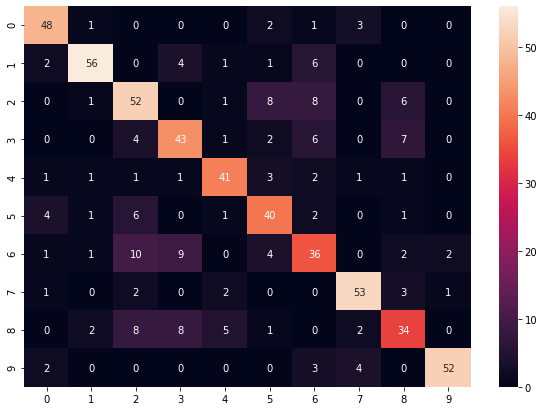

In [23]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)

### Comparing results :  One-Vs-Rest  && One-Vs-One && Sklearn-model

We see that Sklearn's model works best in comparison to my custom model with one-vs-rest and one-vs-one methods.
Also One-vs-one model should give better accuracy as compared to one-vs-rest method, as there are more number of models trained in case of one-vs-one method.

Advantage with one-vs-one over one-vs-rest model is that, data provided for training is not skewed, ie data contains similar count of samples for each class, but in case of one-vs-rest, data gets skewed as the number of labels increases, as there is one postive label and all other labels are treated as negative label.

But the disadvantage of One-vs-one model is that it is very computationally expensive.

# Bonus part : 
### 6. Display few pictures with their predicted and original labels 
### 7. Do the results differ? State the reasons why it is so.

Predicted value is = 4
Actual value : 4


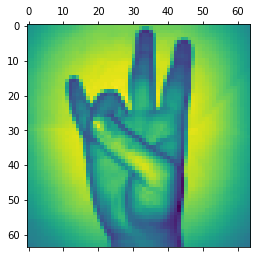

----------------------------------------------------------------------------------------------
Predicted value is = 2
Actual value : 2


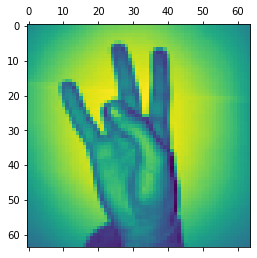

----------------------------------------------------------------------------------------------
Predicted value is = 9
Actual value : 6


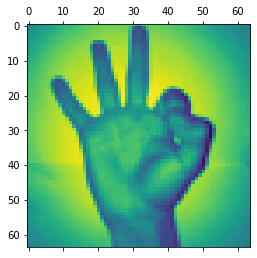

----------------------------------------------------------------------------------------------
Predicted value is = 3
Actual value : 6


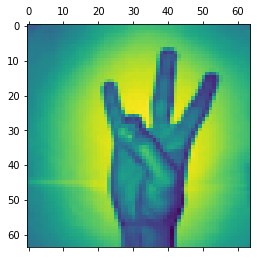

----------------------------------------------------------------------------------------------
Predicted value is = 1
Actual value : 1


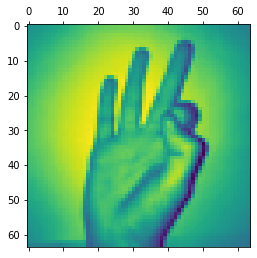

----------------------------------------------------------------------------------------------
Predicted value is = 3
Actual value : 3


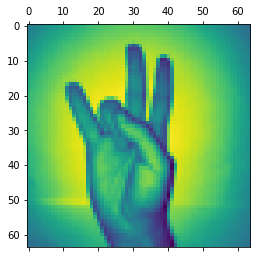

----------------------------------------------------------------------------------------------
Predicted value is = 6
Actual value : 5


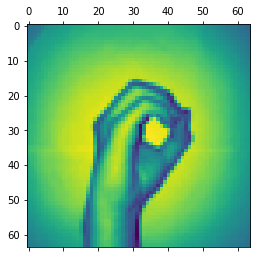

----------------------------------------------------------------------------------------------
Predicted value is = 7
Actual value : 7


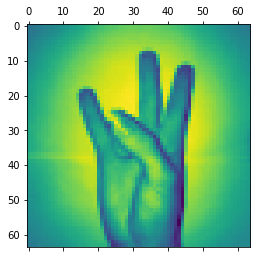

----------------------------------------------------------------------------------------------
Predicted value is = 8
Actual value : 8


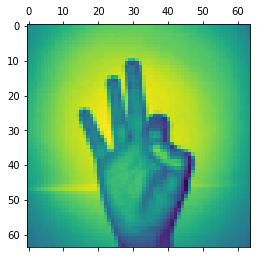

----------------------------------------------------------------------------------------------
Predicted value is = 6
Actual value : 6


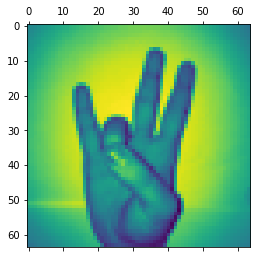

----------------------------------------------------------------------------------------------


In [24]:
# Printing :

# Predicted Value
# Actual Value
# Sign Image of Actual Value
# --------------------------

for i in range(10):
    index = np.random.randint(X_test.shape[0]-1,size=1)
#     print ("X_tes shape : ", X_test.shape)
    print('Predicted value is =', lm.predict([X_test[index[0]]])[0])
    print('Actual value :', str(y_encoded_test[index[0]]))
    plt.matshow(x_l[index[0]]) 
    plt.show() 
    print ("----------------------------------------------------------------------------------------------")